In [2]:
!git clone https://github.com/chandrikadeb7/Face-Mask-Detection.git
!mv Face-Mask-Detection/dataset .

Cloning into 'Face-Mask-Detection'...
remote: Enumerating objects: 4590, done.
remote: Total 4590 (delta 0), reused 0 (delta 0), pack-reused 4590 (from 1)
Receiving objects: 100% (4590/4590), 186.72 MiB | 19.02 MiB/s, done.
Resolving deltas: 100% (271/271), done.
Updating files: 100% (4155/4155), done.


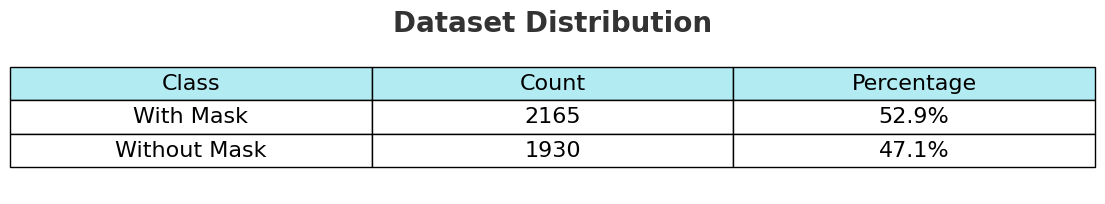

In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Dataset path
dataset_path = Path("dataset")
classes = ["with_mask", "without_mask"]

# Data Distribution Table
counts = [len(list(dataset_path.joinpath(cls).glob("*"))) for cls in classes]
df = pd.DataFrame({
    "Class": ["With Mask", "Without Mask"],
    "Count": counts,
    "Percentage": [f"{(count/sum(counts))*100:.1f}%" for count in counts]
})

# Plotting the table
fig, ax = plt.subplots(figsize=(7, 2))
ax.axis('off')  # Hide the axes

# Create the table
table = ax.table(cellText=df.values,
                colLabels=df.columns,
                cellLoc='center',
                loc='center',
                colColours=["#B3EBF2", "#B3EBF2", "#B3EBF2"],
)

# Styling the table
table.auto_set_font_size(False)
table.set_fontsize(16)
table.scale(2, 2)
plt.title("Dataset Distribution", fontsize=20, fontweight='bold', color='#333')

# Show the plot
plt.show()


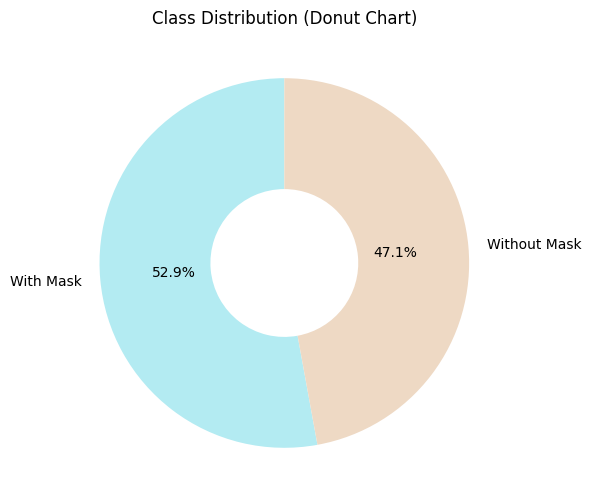

In [10]:
# Donut Chart
plt.figure(figsize=(8, 6))
plt.pie(counts,
        labels=["With Mask", "Without Mask"],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#B3EBF2', '#EED9C4'],
        wedgeprops=dict(width=0.6))
plt.title("Class Distribution (Donut Chart)")
plt.show()

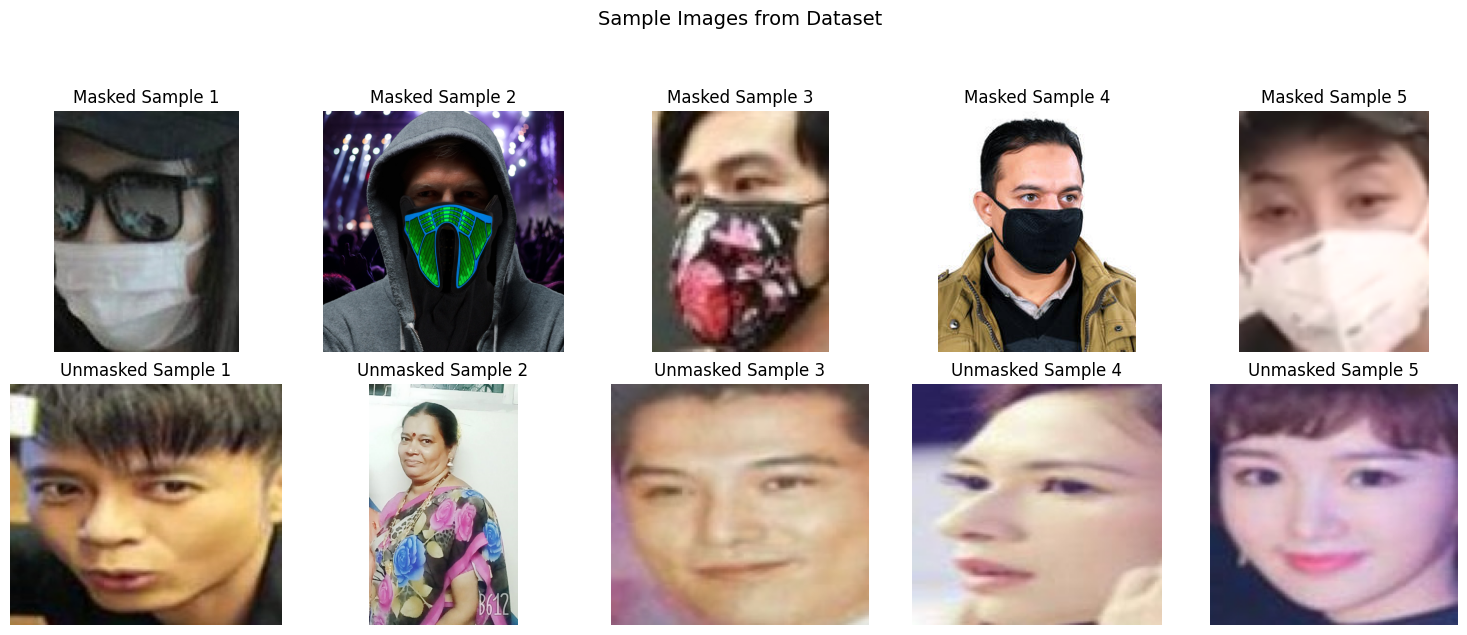

In [4]:

# Sample Images Grid
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
plt.suptitle("Sample Images from Dataset", y=1.05, fontsize=14)

# First row: Masked images
masked_samples = list(dataset_path.joinpath("with_mask").glob("*"))[:5]
for idx, img_path in enumerate(masked_samples):
    img = imread(img_path)
    axes[0, idx].imshow(img)
    axes[0, idx].set_title(f"Masked Sample {idx+1}")
    axes[0, idx].axis('off')

# Second row: Unmasked images
unmasked_samples = list(dataset_path.joinpath("without_mask").glob("*"))[:5]
for idx, img_path in enumerate(unmasked_samples):
    img = imread(img_path)
    axes[1, idx].imshow(img)
    axes[1, idx].set_title(f"Unmasked Sample {idx+1}")
    axes[1, idx].axis('off')

plt.tight_layout()
plt.show()